<a href="https://colab.research.google.com/github/KKugi/Big-Data/blob/main/11_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

In [ ]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud


In [ ]:
inputFileName = '/content/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf8').read())
data #출력하여 내용 확인

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [ ]:
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) +'' # 정규식
message #출력하여 내용 확인

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message) # 명사만 추출
message_N #출력하여 내용 확인

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

In [ ]:
count = Counter(message_N)
count #출력하여 내용 확인

Counter({'가상': 1,
         '가상현실': 1,
         '가장': 2,
         '간판': 1,
         '강': 2,
         '강남구': 1,
         '강연': 1,
         '강의': 1,
         '강점': 1,
         '강조': 1,
         '강추': 1,
         '개념': 1,
         '개막': 1,
         '개최': 1,
         '개편': 1,
         '개혁': 1,
         '거리': 1,
         '격인': 1,
         '경쟁력': 2,
         '경제': 1,
         '경험': 1,
         '공공기관': 2,
         '공무원': 1,
         '공약': 1,
         '공통': 1,
         '과': 1,
         '과정': 2,
         '과제': 2,
         '과학기술': 1,
         '관련': 1,
         '관심': 1,
         '광운대': 1,
         '교수': 1,
         '교육': 2,
         '교차': 1,
         '구글': 1,
         '구현': 1,
         '국내': 2,
         '국면': 1,
         '국정': 2,
         '그': 1,
         '금융': 1,
         '급': 1,
         '기대': 1,
         '기술': 8,
         '기업': 3,
         '꼽': 1,
         '나라': 1,
         '노력': 3,
         '논의': 1,
         '다림': 1,
         '다보스': 1,
         '대비': 2,
         '대선': 1,
         '대응': 3,
    

In [ ]:
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


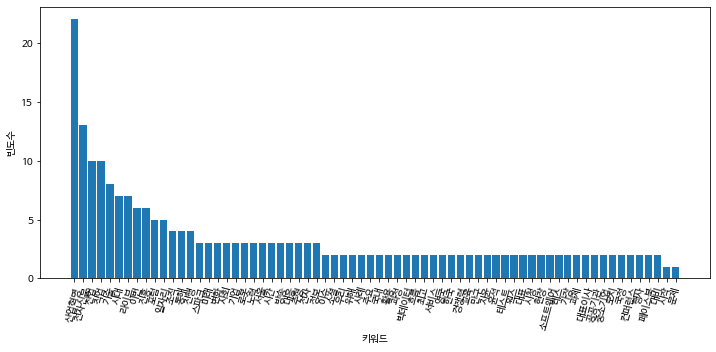

In [ ]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
# plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '75')
plt.show()


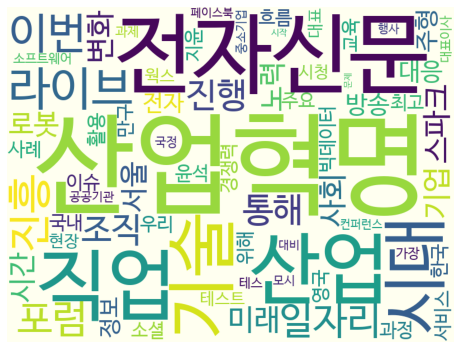

In [ ]:
wc = WordCloud(font_name, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


### 두번째 워드클라우드

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
kkma.sentences('네, 안녕하세요. 반갑습니다.') # sentences: 문장

['네, 안녕하세요.', '반갑습니다.']

In [ ]:
kkma.nouns('질문이나 건의 사항은 홈페이지의 고객센터에 남겨 주세요.')

['질문', '건의', '사항', '홈페이지', '고객', '고객센터', '센터']

In [ ]:
kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^')

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]

### 네이버 기사 제목 뽑기

In [ ]:
from urllib.request import Request, urlopen
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [ ]:
date = '20211108'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
req = Request(news_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req).read()

In [ ]:
html

b'\n\n\n\n\n\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n    <meta charset="euc-kr">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="referrer" contents="always">\n    <meta http-equiv="refresh" content="600"/>\n    <meta name="viewport" content="width=1106"/>\n    <meta name="format-detection" content="telephone=no"/>\n    \r\n    \r\n    \r\n        \r\n            \r\n            \r\n            \r\n            \r\n            \r\n        \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="\xb3\xd7\xc0\xcc\xb9\xf6 \xb4\xba\xbd\xba">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="https://news.naver.com/main/home.naver">\r\n<meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:de

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
news_title = soup.select('div.rankingnews_box > ul > li > div > a')

In [ ]:
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="telephone=no" name="format-detection">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x

In [ ]:
news_title

[<a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=081&amp;aid=0003227918&amp;rankingType=RANKING">양재천서 20대男 수상한 움직임…휴대전화서 영상 쏟아졌다</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=081&amp;aid=0003227905&amp;rankingType=RANKING">이준석 “홍준표, ‘창당’ ‘투팀’ 아니라고 했다…종로 출마? 난 아냐”</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=081&amp;aid=0003227913&amp;rankingType=RANKING">“살려주세요” 외침에 벽 뜯었더니…알몸 남성 갇혀있었다</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=081&amp;aid=0003227709&amp;rankingType=RANKING">“누가 이기나 보자”…40도 고열인 아기에게 약 안 먹인 엄마[이슈픽]</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=081&amp;aid=0003227885&amp;rankingType=RANKING">8명 깔려 

In [ ]:
news_title[0].string

'양재천서 20대男 수상한 움직임…휴대전화서 영상 쏟아졌다'

In [ ]:
crawled_title = []
for title in news_title:
    crawled_title.append(title.string)
    print(title.string)

양재천서 20대男 수상한 움직임…휴대전화서 영상 쏟아졌다
이준석 “홍준표, ‘창당’ ‘투팀’ 아니라고 했다…종로 출마? 난 아냐”
“살려주세요” 외침에 벽 뜯었더니…알몸 남성 갇혀있었다
“누가 이기나 보자”…40도 고열인 아기에게 약 안 먹인 엄마[이슈픽]
8명 깔려 숨지고 300명 약물 중독… 광란의 스콧 콘서트 [현장]
5억 받고 40대도 떠난다… 은행 희망퇴직 올 4000명 넘을 듯
이정재, 연인 임세령과 미국 행사 동반 참석…다정한 모습 눈길
이재명 “국토보유세 신설”… 윤석열 “종부세 전면 재검토”
[단독]유동규, 민간업자에 “1공단 무조건 공원화”… 李 공약 먼저 챙겨
홍준표 “비상식대선 안타까워…선거조직은 떴다방”
이재명 당선은 '정권교체' 23.2% '정권재창출' 63%
'깐부 삐걱' 보도에 홍준표 "대선불참이 당 분열이라니"
[단독] 조선일보 '부산대 총장 인터뷰'는 2420만원짜리
언론이 꼽은 이재명 윤석열 공통점은?
"기자들에게 좀 더 껄끄러운 상대 돼야"
스쿨존 드러누운 초등생들…경적 울리자 놀리듯 춤췄다
"추가 전 국민 재난지원금?…반대 60.1% · 찬성 32.8%"
280m 길이 집트랙 레일 끊겨 5m 아래 추락, 승객 위중
군, 비축 요소수 20만ℓ 방출 검토…급한 불에는 '역부족'
삼성 · 페북은 알고 있다…인터넷을 이을 '또 다른 혁명'
"후보 지지도…윤석열 43.0% '10%p↑' 이재명 31.2% '2.0%p↓'"
IMF "한국 GDP 대비 국가채무 증가 속도 35개 선진국 중 1위"
[월드&포토] "지옥 같았다"…8명 압사한 미 콘서트
[일문일답] 尹 "국민통합 위해 집권초 MB·朴 사면 추진…미진하면 설득"
日 코로나 사망 15개월만에 '0'…감염급감 이유 '의견분분'
"계약하자마자 1억5000만원 벌었어요"…12만명 몰린 과천 오피스텔
2030들 술집 대신 '이곳'에 꽂혔다…"밤새 놀기 좋아요"
아옳이 "건강주사 맞고 온몸 피멍" vs 병원 측 "설명 들어놓고…"
이정재, '7년 열애' 임세령 허리에 팔 두르고…美 행사

In [ ]:
title = "".join(crawled_title)

In [ ]:
title

'양재천서 20대男 수상한 움직임…휴대전화서 영상 쏟아졌다이준석 “홍준표, ‘창당’ ‘투팀’ 아니라고 했다…종로 출마? 난 아냐”“살려주세요” 외침에 벽 뜯었더니…알몸 남성 갇혀있었다“누가 이기나 보자”…40도 고열인 아기에게 약 안 먹인 엄마[이슈픽]8명 깔려 숨지고 300명 약물 중독… 광란의 스콧 콘서트 [현장]5억 받고 40대도 떠난다… 은행 희망퇴직 올 4000명 넘을 듯이정재, 연인 임세령과 미국 행사 동반 참석…다정한 모습 눈길이재명 “국토보유세 신설”… 윤석열 “종부세 전면 재검토”[단독]유동규, 민간업자에 “1공단 무조건 공원화”… 李 공약 먼저 챙겨홍준표 “비상식대선 안타까워…선거조직은 떴다방”이재명 당선은 \'정권교체\' 23.2% \'정권재창출\' 63%\'깐부 삐걱\' 보도에 홍준표 "대선불참이 당 분열이라니"[단독] 조선일보 \'부산대 총장 인터뷰\'는 2420만원짜리언론이 꼽은 이재명 윤석열 공통점은?"기자들에게 좀 더 껄끄러운 상대 돼야"스쿨존 드러누운 초등생들…경적 울리자 놀리듯 춤췄다"추가 전 국민 재난지원금?…반대 60.1% · 찬성 32.8%"280m 길이 집트랙 레일 끊겨 5m 아래 추락, 승객 위중군, 비축 요소수 20만ℓ 방출 검토…급한 불에는 \'역부족\'삼성 · 페북은 알고 있다…인터넷을 이을 \'또 다른 혁명\'"후보 지지도…윤석열 43.0% \'10%p↑\' 이재명 31.2% \'2.0%p↓\'"IMF "한국 GDP 대비 국가채무 증가 속도 35개 선진국 중 1위"[월드&포토] "지옥 같았다"…8명 압사한 미 콘서트[일문일답] 尹 "국민통합 위해 집권초 MB·朴 사면 추진…미진하면 설득"日 코로나 사망 15개월만에 \'0\'…감염급감 이유 \'의견분분\'"계약하자마자 1억5000만원 벌었어요"…12만명 몰린 과천 오피스텔2030들 술집 대신 \'이곳\'에 꽂혔다…"밤새 놀기 좋아요"아옳이 "건강주사 맞고 온몸 피멍" vs 병원 측 "설명 들어놓고…"이정재, \'7년 열애\' 임세령 허리에 팔 두르고…美 행사 포착

In [ ]:
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')
filtered_title

'양재천서 20대男 수상한 움직임…휴대전화서 영상 쏟아졌다이준석 “홍준표  ‘창당’ ‘투팀’ 아니라고 했다…종로 출마? 난 아냐”“살려주세요” 외침에 벽 뜯었더니…알몸 남성 갇혀있었다“누가 이기나 보자”…40도 고열인 아기에게 약 안 먹인 엄마[이슈픽]8명 깔려 숨지고 300명 약물 중독… 광란의 스콧 콘서트 [현장]5억 받고 40대도 떠난다… 은행 희망퇴직 올 4000명 넘을 듯이정재  연인 임세령과 미국 행사 동반 참석…다정한 모습 눈길이재명 “국토보유세 신설”… 윤석열 “종부세 전면 재검토”[단독]유동규  민간업자에 “1공단 무조건 공원화”… 李 공약 먼저 챙겨홍준표 “비상식대선 안타까워…선거조직은 떴다방”이재명 당선은  정권교체  23 2%  정권재창출  63% 깐부 삐걱  보도에 홍준표  대선불참이 당 분열이라니 [단독] 조선일보  부산대 총장 인터뷰 는 2420만원짜리언론이 꼽은 이재명 윤석열 공통점은? 기자들에게 좀 더 껄끄러운 상대 돼야 스쿨존 드러누운 초등생들…경적 울리자 놀리듯 춤췄다 추가 전 국민 재난지원금?…반대 60 1%   찬성 32 8% 280m 길이 집트랙 레일 끊겨 5m 아래 추락  승객 위중군  비축 요소수 20만ℓ 방출 검토…급한 불에는  역부족 삼성   페북은 알고 있다…인터넷을 이을  또 다른 혁명  후보 지지도…윤석열 43 0%  10%p↑  이재명 31 2%  2 0%p↓  IMF  한국 GDP 대비 국가채무 증가 속도 35개 선진국 중 1위 [월드&포토]  지옥 같았다 …8명 압사한 미 콘서트[일문일답] 尹  국민통합 위해 집권초 MB 朴 사면 추진…미진하면 설득 日 코로나 사망 15개월만에  0 …감염급감 이유  의견분분  계약하자마자 1억5000만원 벌었어요 …12만명 몰린 과천 오피스텔2030들 술집 대신  이곳 에 꽂혔다… 밤새 놀기 좋아요 아옳이  건강주사 맞고 온몸 피멍  vs 병원 측  설명 들어놓고… 이정재   7년 열애  임세령 허리에 팔 두르고…美 행사 포착10대 男 다이빙 선수 영상에  몸 예쁘다 

In [ ]:
tw = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
tokens_ko = tw.nouns(filtered_title)
tokens_ko

['양재천',
 '수상한',
 '움직임',
 '휴대전화',
 '영상',
 '이준석',
 '홍준표',
 '창',
 '투팀',
 '종로',
 '출마',
 '난',
 '외침',
 '벽',
 '알몸',
 '남성',
 '누가',
 '이기',
 '도',
 '고열',
 '아기',
 '약',
 '안',
 '엄마',
 '이슈',
 '픽',
 '명',
 '명',
 '약물',
 '중독',
 '광란',
 '스콧',
 '콘서트',
 '현장',
 '대도',
 '은행',
 '희망',
 '퇴직',
 '명',
 '듯',
 '이정재',
 '연인',
 '임세령',
 '미국',
 '행사',
 '동반',
 '참석',
 '모습',
 '눈길',
 '이재명',
 '국토',
 '보',
 '유세',
 '신설',
 '윤석열',
 '종부세',
 '전면',
 '재',
 '검토',
 '단독',
 '유동',
 '규',
 '민간',
 '업자',
 '공단',
 '무조건',
 '공원',
 '공약',
 '먼저',
 '홍준표',
 '비상',
 '대선',
 '선거',
 '조직',
 '다방',
 '이재명',
 '당선',
 '정권',
 '교체',
 '정권',
 '재창',
 '부',
 '삐걱',
 '보도',
 '홍준표',
 '대선',
 '불참',
 '당',
 '분열',
 '단독',
 '조선일보',
 '부산',
 '총장',
 '인터뷰',
 '꼽',
 '이재명',
 '윤석열',
 '공통점',
 '기자',
 '좀',
 '더',
 '껄끄러운',
 '상대',
 '스쿨존',
 '누운',
 '초등생',
 '경적',
 '추가',
 '전',
 '국민',
 '재난',
 '원금',
 '반대',
 '찬성',
 '길이',
 '집',
 '트랙',
 '레일',
 '아래',
 '추락',
 '승객',
 '위중',
 '비축',
 '소수',
 '방출',
 '검토',
 '불',
 '역',
 '부족',
 '삼성',
 '페북',
 '알',
 '인터넷',
 '또',
 '다른',
 '혁명',
 '후보',
 '지지도',
 '윤석열',
 '이재명',
 '한국',
 '대비',


In [ ]:
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens

['양재천',
 '수상한',
 '움직임',
 '휴대전화',
 '영상',
 '이준석',
 '홍준표',
 '창',
 '투팀',
 '종로',
 '출마',
 '난',
 '외침',
 '벽',
 '알몸',
 '남성',
 '누가',
 '이기',
 '도',
 '고열',
 '아기',
 '약',
 '안',
 '엄마',
 '이슈',
 '픽',
 '명',
 '명',
 '약물',
 '중독',
 '광란',
 '스콧',
 '콘서트',
 '현장',
 '대도',
 '은행',
 '희망',
 '퇴직',
 '명',
 '듯',
 '이정재',
 '연인',
 '임세령',
 '미국',
 '행사',
 '동반',
 '참석',
 '모습',
 '눈길',
 '이재명',
 '국토',
 '보',
 '유세',
 '신설',
 '윤석열',
 '종부세',
 '전면',
 '재',
 '검토',
 '단독',
 '유동',
 '규',
 '민간',
 '업자',
 '공단',
 '무조건',
 '공원',
 '공약',
 '먼저',
 '홍준표',
 '비상',
 '대선',
 '선거',
 '조직',
 '다방',
 '이재명',
 '당선',
 '정권',
 '교체',
 '정권',
 '재창',
 '부',
 '삐걱',
 '보도',
 '홍준표',
 '대선',
 '불참',
 '당',
 '분열',
 '단독',
 '조선일보',
 '부산',
 '총장',
 '인터뷰',
 '꼽',
 '이재명',
 '윤석열',
 '공통점',
 '기자',
 '좀',
 '더',
 '껄끄러운',
 '상대',
 '스쿨존',
 '누운',
 '초등생',
 '경적',
 '추가',
 '전',
 '국민',
 '재난',
 '원금',
 '반대',
 '찬성',
 '길이',
 '집',
 '트랙',
 '레일',
 '아래',
 '추락',
 '승객',
 '위중',
 '비축',
 '소수',
 '방출',
 '검토',
 '불',
 '역',
 '부족',
 '삼성',
 '페북',
 '알',
 '인터넷',
 '또',
 '다른',
 '혁명',
 '후보',
 '지지도',
 '윤석열',
 '이재명',
 '한국',
 '대비',


In [ ]:
ko.vocab()

FreqDist({'양재천': 1,
          '수상한': 2,
          '움직임': 1,
          '휴대전화': 1,
          '영상': 5,
          '이준석': 8,
          '홍준표': 12,
          '창': 2,
          '투팀': 1,
          '종로': 2,
          '출마': 1,
          '난': 1,
          '외침': 1,
          '벽': 4,
          '알몸': 1,
          '남성': 4,
          '누가': 2,
          '이기': 2,
          '도': 3,
          '고열': 1,
          '아기': 2,
          '약': 3,
          '안': 6,
          '엄마': 4,
          '이슈': 1,
          '픽': 2,
          '명': 17,
          '약물': 1,
          '중독': 1,
          '광란': 2,
          '스콧': 1,
          '콘서트': 3,
          '현장': 6,
          '대도': 1,
          '은행': 1,
          '희망': 2,
          '퇴직': 1,
          '듯': 1,
          '이정재': 10,
          '연인': 1,
          '임세령': 10,
          '미국': 4,
          '행사': 8,
          '동반': 7,
          '참석': 5,
          '모습': 3,
          '눈길': 1,
          '이재명': 45,
          '국토': 1,
          '보': 1,
          '유세': 1,
          '신설': 1,
      

In [ ]:
new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)
new_ko

['양재천',
 '수상한',
 '움직임',
 '휴대전화',
 '영상',
 '이준석',
 '홍준표',
 '투팀',
 '종로',
 '출마',
 '외침',
 '알몸',
 '남성',
 '누가',
 '이기',
 '고열',
 '아기',
 '엄마',
 '이슈',
 '약물',
 '중독',
 '광란',
 '스콧',
 '콘서트',
 '현장',
 '대도',
 '은행',
 '희망',
 '퇴직',
 '이정재',
 '연인',
 '임세령',
 '미국',
 '행사',
 '동반',
 '참석',
 '모습',
 '눈길',
 '이재명',
 '국토',
 '유세',
 '신설',
 '윤석열',
 '종부세',
 '전면',
 '검토',
 '유동',
 '민간',
 '업자',
 '공단',
 '무조건',
 '공원',
 '공약',
 '먼저',
 '홍준표',
 '비상',
 '대선',
 '선거',
 '조직',
 '다방',
 '이재명',
 '당선',
 '정권',
 '교체',
 '정권',
 '재창',
 '삐걱',
 '보도',
 '홍준표',
 '대선',
 '불참',
 '분열',
 '조선일보',
 '부산',
 '총장',
 '인터뷰',
 '이재명',
 '윤석열',
 '공통점',
 '기자',
 '껄끄러운',
 '상대',
 '스쿨존',
 '누운',
 '초등생',
 '경적',
 '추가',
 '국민',
 '재난',
 '원금',
 '반대',
 '찬성',
 '길이',
 '트랙',
 '레일',
 '아래',
 '추락',
 '승객',
 '위중',
 '비축',
 '소수',
 '방출',
 '검토',
 '부족',
 '삼성',
 '페북',
 '인터넷',
 '다른',
 '혁명',
 '후보',
 '지지도',
 '윤석열',
 '이재명',
 '한국',
 '대비',
 '국가채무',
 '증가',
 '속도',
 '선진국',
 '월드',
 '포토',
 '지옥',
 '압사',
 '콘서트',
 '일문일답',
 '국민',
 '통합',
 '위해',
 '집권',
 '사면',
 '추진',
 '설득',
 '코로나',
 '사망',
 '개월',
 '감염',
 '급감',
 '이

In [ ]:
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()

FreqDist({'양재천': 1,
          '수상한': 2,
          '움직임': 1,
          '휴대전화': 1,
          '영상': 5,
          '이준석': 8,
          '홍준표': 12,
          '투팀': 1,
          '종로': 2,
          '출마': 1,
          '외침': 1,
          '알몸': 1,
          '남성': 4,
          '누가': 2,
          '이기': 2,
          '고열': 1,
          '아기': 2,
          '엄마': 4,
          '이슈': 1,
          '약물': 1,
          '중독': 1,
          '광란': 2,
          '스콧': 1,
          '콘서트': 3,
          '현장': 6,
          '대도': 1,
          '은행': 1,
          '희망': 2,
          '퇴직': 1,
          '이정재': 10,
          '연인': 1,
          '임세령': 10,
          '미국': 4,
          '행사': 8,
          '동반': 7,
          '참석': 5,
          '모습': 3,
          '눈길': 1,
          '이재명': 45,
          '국토': 1,
          '유세': 1,
          '신설': 1,
          '윤석열': 48,
          '종부세': 1,
          '전면': 2,
          '검토': 3,
          '유동': 2,
          '민간': 1,
          '업자': 3,
          '공단': 1,
          '무조건': 1,
          '공

In [ ]:
data = ko.vocab().most_common(150)
data = dict(data)
data

{'가능': 3,
 '가지': 5,
 '개월': 6,
 '걱정': 3,
 '건강': 4,
 '검찰': 4,
 '검토': 3,
 '게임': 5,
 '격차': 4,
 '경찰': 4,
 '고발': 3,
 '공개': 3,
 '공급': 3,
 '교체': 3,
 '구성': 3,
 '구찌': 3,
 '국가채무': 3,
 '국민': 17,
 '기자': 4,
 '긴급': 3,
 '남성': 4,
 '내년': 6,
 '논란': 5,
 '논의': 3,
 '누가': 2,
 '대결': 5,
 '대란': 3,
 '대비': 3,
 '대선': 12,
 '대위': 5,
 '대통령': 4,
 '동반': 7,
 '라이터': 3,
 '리움': 3,
 '매점매석': 5,
 '머스크': 4,
 '모습': 3,
 '미국': 4,
 '미래': 3,
 '민생': 5,
 '민주': 3,
 '반대': 8,
 '반도체': 4,
 '백신': 3,
 '벌금': 3,
 '보복': 3,
 '복권': 3,
 '분열': 6,
 '불로': 3,
 '불법': 3,
 '불참': 5,
 '비리': 4,
 '비트코인': 3,
 '사고': 4,
 '사람': 4,
 '사망': 6,
 '사면': 3,
 '삼성': 6,
 '상승': 3,
 '성폭행': 6,
 '세계': 4,
 '소수': 14,
 '속도': 5,
 '속보': 6,
 '수상한': 2,
 '수입': 4,
 '시간': 3,
 '시작': 3,
 '신규': 6,
 '싸움': 4,
 '아내': 3,
 '아들': 4,
 '아이': 3,
 '애플': 3,
 '양자': 4,
 '엄마': 4,
 '업자': 3,
 '여성': 4,
 '여자': 3,
 '여행': 3,
 '역대': 3,
 '열애': 3,
 '영상': 5,
 '오늘': 3,
 '원금': 6,
 '위중': 3,
 '위험': 3,
 '위협': 3,
 '윤석열': 48,
 '의혹': 3,
 '이기': 2,
 '이유': 5,
 '이재명': 45,
 '이정재': 10,
 '이준석': 8,
 '이하': 3,
 '이후': 3,
 '인터뷰': 

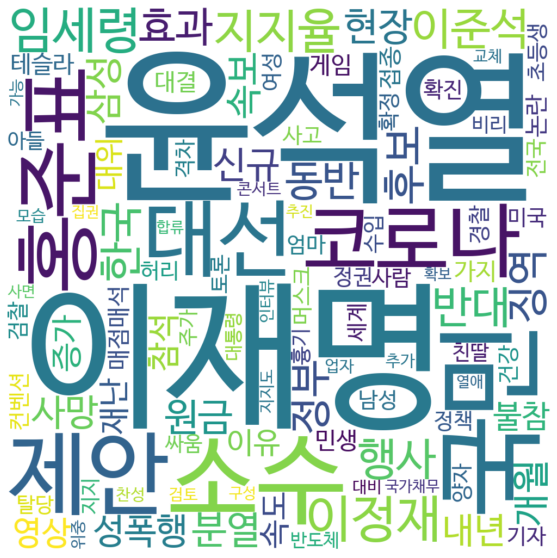

In [ ]:
font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font, background_color="white", width=1000, height=1000, max_words=100, max_font_size=300)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

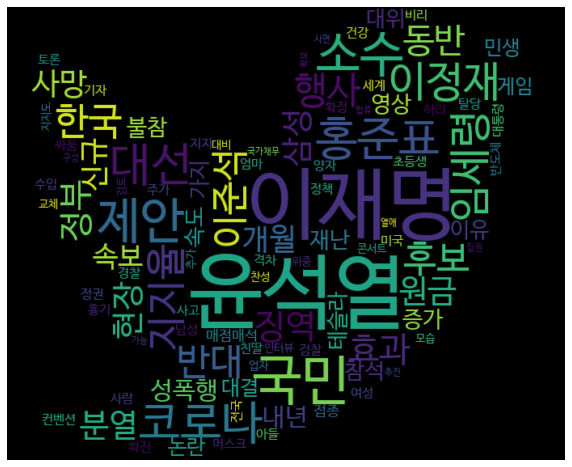

In [ ]:
import numpy as np
from PIL import Image
custom_mask = np.array(Image.open('다운로드.png'))

font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font, background_color="black", mask=custom_mask, width=500, height=500, max_words=100, max_font_size=100)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()